In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Завдання 1

    1.1 Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

In [2]:
k = 2
b = 2

x = np.linspace(0, 10, 1000)
y = k * x + b + np.random.randn(1000)

    1.2 Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [3]:
def least_squares(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)

    k_pred = (np.sum((x - mean_x) * (y - mean_y))) / (np.sum((x - mean_x)**2))
    b_pred = mean_y - k * mean_x
    return k_pred, b_pred

In [4]:
k_pred, b_pred = least_squares(x, y)


In [5]:
k_poly, b_poly = np.polyfit(x, y, 1)

    1.3 Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [6]:
print(f"k = {k}, b = {b} - початкові параметри прямої")
print(f"k_pred = {k_pred}, b_pred = {b_pred} - оцінки параметрів за допомогою LSM")
print(f"k_poly = {k_poly}, b_poly = {b_poly} - оцінки параметрів за допомогою polyfit")

k = 2, b = 2 - початкові параметри прямої
k_pred = 2.007290744154497, b_pred = 1.9849150733071035 - оцінки параметрів за допомогою LSM
k_poly = 2.007290744154498, b_poly = 1.9484613525346146 - оцінки параметрів за допомогою polyfit


    1.4 Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

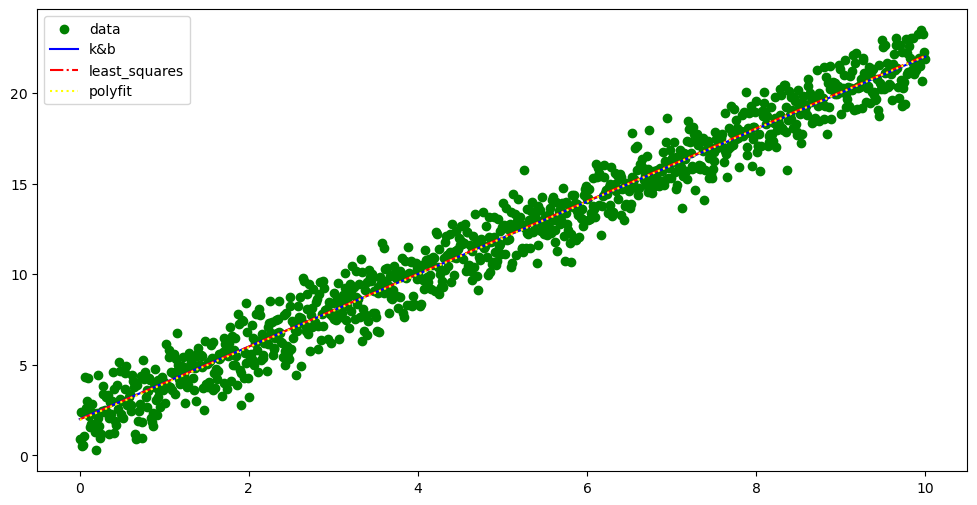

In [7]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='green', label='data')
plt.plot(x, k * x + b, color='blue', label='k&b')
plt.plot(x, k_pred * x + b_pred, color='red', linestyle='-.', label='least_squares')
plt.plot(x, k_poly * x + b_poly, color='yellow', linestyle=':', label='polyfit')
plt.legend()
plt.show()

### Завдання 2 

    2.1 Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [8]:
def gradient_descent(x, y, learning_rate = 0.01, n_iter = 10000):
    k = 0
    b = 0
    m = len(x)
    inaccuracies = []

    for _ in range(n_iter):
        grad_k = (-2/m) * np.sum(x * (y - (k*x + b)))
        grad_b = (-2/m) * np.sum(y - (k*x + b))

        k -= learning_rate * grad_k
        b -= learning_rate * grad_b

        #MSE
        inaccuracy = np.mean((y - (k*x + b))**2)
        inaccuracies.append(inaccuracy)

    return k, b, inaccuracies

In [9]:
learning_rate = 0.001
n_iter = 1000
k_grad_des, b_grad_des, inaccuracies = gradient_descent(x, y, learning_rate, n_iter)

    2.2 Додайте отриману лінію регресії на загальний графік

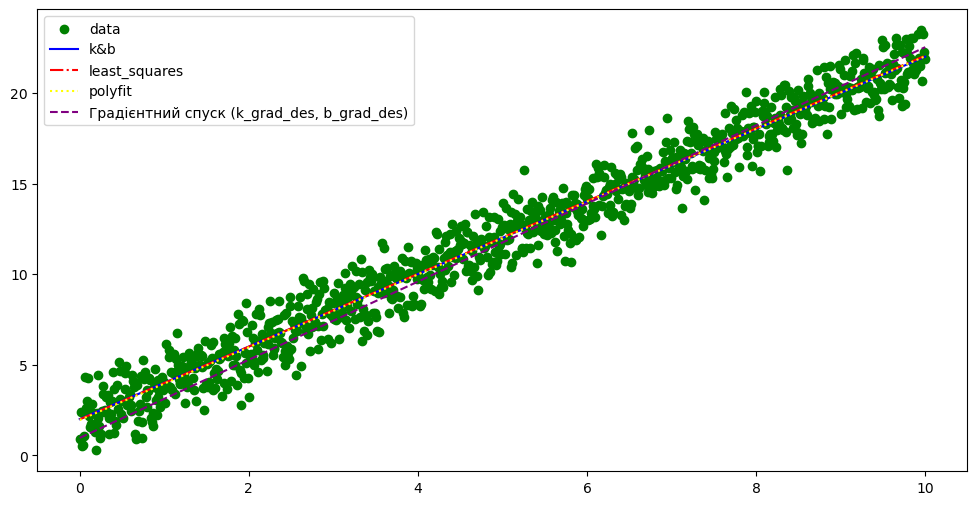

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='green', label='data')
plt.plot(x, k * x + b, color='blue', label='k&b')
plt.plot(x, k_pred * x + b_pred, color='red', linestyle='-.', label='least_squares')
plt.plot(x, k_poly * x + b_poly, color='yellow', linestyle=':', label='polyfit')
plt.plot(x, k_grad_des * x + b_grad_des, color='purple', linestyle='--', 
         label='Gradient descent (k_grad_des, b_grad_des)')
plt.legend()
plt.show()

    2.3 Побудуйте графік похибки від кількості ітерацій, зробіть висновки

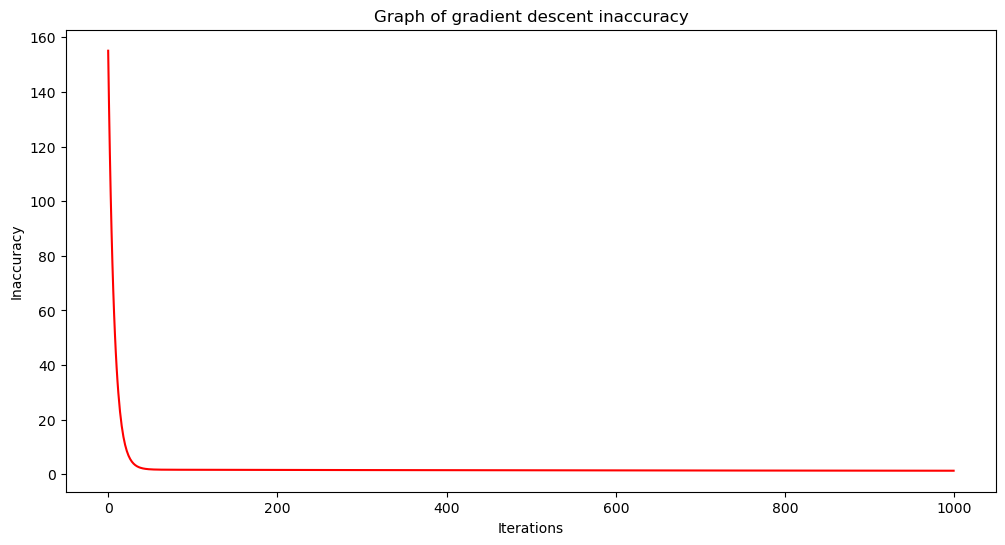

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(n_iter), inaccuracies, color='red')
plt.xlabel('Iterations')
plt.ylabel('Inaccuracy')
plt.title('Graph of gradient descent inaccuracy')
plt.show()

    2.4 Порівняйте отримані результати з результатами попереднього завдання

In [12]:
print(f"k = {k}, b = {b} - початкові параметри прямої")
print(f"k_pred = {k_pred}, b_pred = {b_pred} - оцінки параметрів за допомогою LSM")
print(f"k_poly = {k_poly}, b_poly = {b_poly} - оцінки параметрів за допомогою polyfit")
print(f"k_grad_des = {k_grad_des}, b_grad_des = {b_grad_des}- оцінка параметрів за допомогою градієнтного спуску")

k = 2, b = 2 - початкові параметри прямої
k_pred = 2.007290744154497, b_pred = 1.9849150733071035 - оцінки параметрів за допомогою LSM
k_poly = 2.007290744154498, b_poly = 1.9484613525346146 - оцінки параметрів за допомогою polyfit
k_grad_des = 2.15616233967771, b_grad_des = 0.9627769987446287- оцінка параметрів за допомогою градієнтного спуску
